# KNN MNIST


## Import libraries

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

## Load MNIST Dataset and split it

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



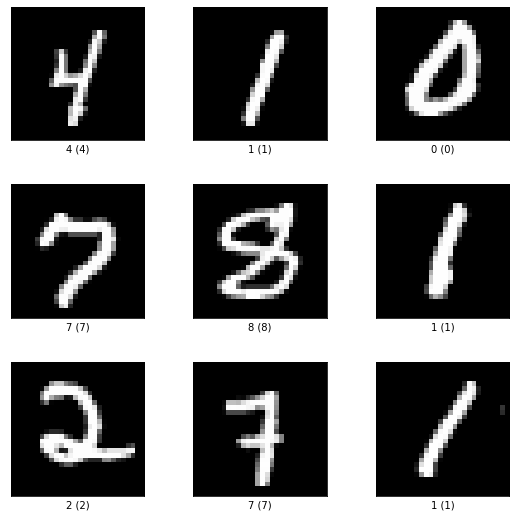

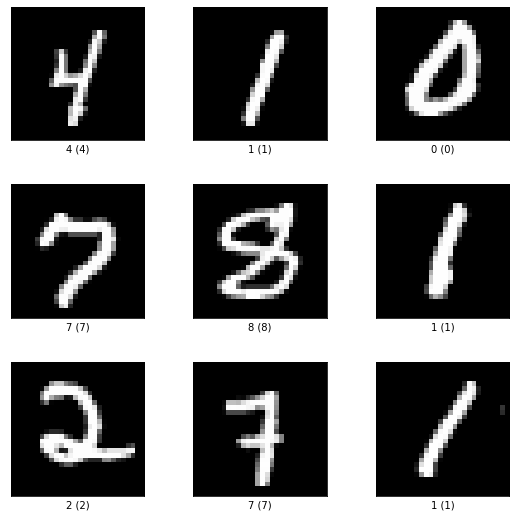

In [ ]:
# Load full size of MNIST
MNIST_full, MNIST_info = tfds.load(
    'mnist',
    split='train+test',
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
print(MNIST_info)

tfds.show_examples(MNIST_full, MNIST_info)

In [ ]:
# Dataset size of MNIST
mnist_dataset_size = float( tf.data.experimental.cardinality(MNIST_full) )
print('Full dataset size of MNIST:', mnist_dataset_size)

Full dataset size of MNIST: 70000.0


In [ ]:
# Split full dataset into train:test = 80:20
train_test_split = 0.8

mnist_train_size = round(mnist_dataset_size * train_test_split)
mnist_test_size = round(mnist_dataset_size - mnist_train_size)


MNIST_train = MNIST_full.take(mnist_train_size)
print('Size of Train_set:', mnist_train_size)

MNIST_test = MNIST_full.skip(mnist_train_size)
print('Size of Test_set:', mnist_test_size)

Size of Train_set: 56000
Size of Test_set: 14000


## Prepare x,y

In [ ]:
x_train = []
x_test = []
y_train = []
y_test = []

for images, labels in MNIST_train:
  x_train.append(images.numpy())
  y_train.append(labels.numpy())

for images, labels in MNIST_test:
  x_test.append(images.numpy())
  y_test.append(labels.numpy())


print('shape of train_images:', np.shape(x_train))
print('shape of train_labels:', np.shape(y_train))

print('shape of test_images:', np.shape(x_test))
print('shape of test_labels:', np.shape(y_test))

shape of train_images: (56000, 28, 28, 1)
shape of train_labels: (56000,)
shape of test_images: (14000, 28, 28, 1)
shape of test_labels: (14000,)


### Normalize

In [ ]:
# Normalize pixel values to 0 ~ 1
x_train, x_test = x_train / np.asarray(255.0), x_test / np.asarray(255.0)

### Reshape

In [ ]:
# Reshape data from 56000*28*28 to 56000*764
x_train = np.reshape(x_train ,(56000, 784))
x_test = np.reshape(x_test, (14000, 784))

print('shape of train_images:', np.shape(x_train))
print('shape of train_labels:', np.shape(y_train))

print('shape of test_images:', np.shape(x_test))
print('shape of test_labels:', np.shape(y_test))

shape of train_images: (56000, 784)
shape of train_labels: (56000,)
shape of test_images: (14000, 784)
shape of test_labels: (14000,)


## KNN Model for MNIST

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Search k-value from k=1 to k=11
kVals = np.arange(1,12,2)

# Searching for best k-value
for k in kVals:
    
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    
    # evaluate the model and update the accuracies list
    score = model.score(x_test, y_test)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))

k=1, accuracy=97.23%
k=3, accuracy=97.22%
k=5, accuracy=97.03%
k=7, accuracy=96.87%
k=9, accuracy=96.76%
k=11, accuracy=96.67%


In [ ]:
best_k = 1
# Predict with best k-value

model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1345
           1       0.97      0.99      0.98      1580
           2       0.99      0.97      0.98      1393
           3       0.97      0.96      0.97      1467
           4       0.98      0.96      0.97      1369
           5       0.96      0.96      0.96      1236
           6       0.98      0.99      0.98      1392
           7       0.97      0.99      0.98      1483
           8       0.98      0.94      0.96      1364
           9       0.94      0.97      0.96      1371

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



# KNN KMNIST

## Load KMNIST Dataset and split it

Shuffling and writing examples to /root/tensorflow_datasets/kmnist/3.0.1.incompleteA3XQO6/kmnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/kmnist/3.0.1.incompleteA3XQO6/kmnist-test.tfrecord


Dataset kmnist downloaded and prepared to /root/tensorflow_datasets/kmnist/3.0.1. Subsequent calls will reuse this data.


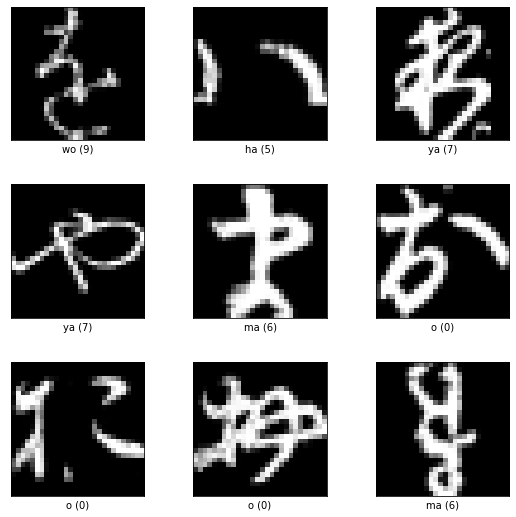

Full dataset size of KMNIST: 70000.0
Size of Train_set: 56000
Size of Test_set: 14000


In [ ]:
# Load full size of MNIST
KMNIST_full, KMNIST_info = tfds.load(
    'kmnist',
    split='train+test',
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
tfds.show_examples(KMNIST_full, KMNIST_info)


# Print dataset size of MNIST
kmnist_dataset_size = float( tf.data.experimental.cardinality(KMNIST_full) )
print('Full dataset size of KMNIST:', kmnist_dataset_size)

# Split full dataset into train:test = 80:20
train_test_split = 0.8

kmnist_train_size = round(kmnist_dataset_size * train_test_split)
kmnist_test_size = round(kmnist_dataset_size - kmnist_train_size)

KMNIST_train = KMNIST_full.take(kmnist_train_size)
print('Size of Train_set:', kmnist_train_size)

KMNIST_test = KMNIST_full.skip(kmnist_train_size)
print('Size of Test_set:', kmnist_test_size)

## Prepare x,y

In [ ]:
x_train = []
x_test = []
y_train = []
y_test = []
for images, labels in KMNIST_train:
  x_train.append(images.numpy())
  y_train.append(labels.numpy())

for images, labels in KMNIST_test:
  x_test.append(images.numpy())
  y_test.append(labels.numpy())

print('shape of train_images:', np.shape(x_train))
print('shape of train_labels:', np.shape(y_train))

print('shape of test_images:', np.shape(x_test))
print('shape of test_labels:', np.shape(y_test))

shape of train_images: (56000, 28, 28, 1)
shape of train_labels: (56000,)
shape of test_images: (14000, 28, 28, 1)
shape of test_labels: (14000,)


### Normalize

In [ ]:
# Normalize pixel values to 0 ~ 1
x_train, x_test = x_train / np.asarray(255.0), x_test / np.asarray(255.0)

### Reshape

In [ ]:
# Reshape data from 56000*28*28 to 56000*764
x_train = np.reshape(x_train ,(56000, 784))
x_test = np.reshape(x_test, (14000, 784))

In [ ]:
print('shape of train_images:', np.shape(x_train))
print('shape of train_labels:', np.shape(y_train))

print('shape of test_images:', np.shape(x_test))
print('shape of test_labels:', np.shape(y_test))

shape of train_images: (56000, 784)
shape of train_labels: (56000,)
shape of test_images: (14000, 784)
shape of test_labels: (14000,)


## KNN Model for KMNIST

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Search k-value from k=1 to k=11
kVals = np.arange(1,12,2)

# Searching for best k-value
for k in kVals:
    
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    
    # evaluate the model and update the accuracies list
    score = model.score(x_test, y_test)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))

k=1, accuracy=97.01%
k=3, accuracy=96.94%
k=5, accuracy=96.66%
k=7, accuracy=96.57%
k=9, accuracy=96.32%
k=11, accuracy=96.07%


In [ ]:
best_k = 1
# Predict with best k-value

model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1358
           1       0.98      0.96      0.97      1439
           2       0.96      0.96      0.96      1386
           3       0.97      0.98      0.97      1455
           4       0.98      0.96      0.97      1332
           5       0.95      0.98      0.97      1411
           6       0.96      0.96      0.96      1442
           7       0.99      0.97      0.98      1447
           8       0.96      0.97      0.97      1370
           9       0.98      0.98      0.98      1360

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000

